In [1]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [13]:
df_train = pd.read_csv('../static/data/titanic_train.csv')
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,24.000000,0,0,8.85,7,3
1,0,3,1,29.699118,8,2,69.55,7,3
2,1,2,0,30.000000,0,0,12.35,7,2


In [19]:
X_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, 0].values
X_train.shape, y_train.shape

((668, 8), (668,))

In [20]:
df_test = pd.read_csv('../static/data/titanic_test.csv')
df_test.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,20.0,0,0,8.6625,7,3
1,0,3,1,22.0,0,0,7.8958,7,3
2,0,3,1,33.0,0,0,7.8958,7,0


In [21]:
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values
X_test.shape, y_test.shape

((223, 8), (223,))

In [22]:
scaler = MinMaxScaler()
scaler.fit(df_train.iloc[:, 1:])

MinMaxScaler()

In [23]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((668, 8), (223, 8))

In [24]:
joblib.dump(scaler, '../static/model/titanic_scaler.pkl')

['../static/model/titanic_scaler.pkl']

### 1. Logistic Regression

In [25]:
lr_clf = LogisticRegression()
lr_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [26]:
params = {
    'C': [0.01, 0.03, 0.05, 0.07]
}

In [27]:
grid_cv = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train_scaled, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.8174
최적 파라미터: {'C': 0.05}


In [28]:
best_lr = grid_cv.best_estimator_
pred = best_lr.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.8026905829596412

In [29]:
joblib.dump(best_lr, '../static/model/titanic_lr.pkl')

['../static/model/titanic_lr.pkl']

### 2. SVM

In [31]:
sv_clf = SVC()
sv_clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [32]:
params = {
    'C': [13, 14, 15, 16, 17, 18]
}

In [33]:
grid_cv = GridSearchCV(sv_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train_scaled, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.8309
최적 파라미터: {'C': 17}


In [34]:
best_sv = grid_cv.best_estimator_
pred = best_sv.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.8071748878923767

In [35]:
joblib.dump(best_lr, '../static/model/titanic_sv.pkl')

['../static/model/titanic_sv.pkl']

### 3. Random Forest

In [36]:
rf_clf = RandomForestClassifier()
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
params = {
    #'max_depth': [4, 6, 8, 10],
    'max_depth': [7, 8, 9],
    'min_samples_split': [2, 3, 4]
    #'min_samples_split': [3, 4, 5, 6]
}

In [38]:
grid_cv = GridSearchCV(rf_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train_scaled, y_train)
print(f'최고 평균 정확도: {grid_cv.best_score_:.4f}')
print('최적 파라미터:', grid_cv.best_params_)

최고 평균 정확도: 0.8339
최적 파라미터: {'max_depth': 7, 'min_samples_split': 2}


In [39]:
best_rf = grid_cv.best_estimator_
pred = best_rf.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.8116591928251121

In [40]:
joblib.dump(best_rf, '../static/model/titanic_rf.pkl')

['../static/model/titanic_rf.pkl']

### NaN 값 찾기 

In [11]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train['Cabin'].fillna('N',inplace=True)
df_train['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ', df_train.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [12]:
print('Sex 값 분포 :\n', df_train['Sex'].value_counts())

Sex 값 분포 :
 1    432
0    236
Name: Sex, dtype: int64


In [34]:
print('Cabin 값 분포 :\n', df_train['Cabin'].value_counts())

Cabin 값 분포 :
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
F2               3
              ... 
E49              1
A7               1
A26              1
D9               1
D11              1
Name: Cabin, Length: 148, dtype: int64


In [35]:
print('Embarked 값 분포 :\n', df_train['Embarked'].value_counts())

Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [36]:
df_train['Cabin'] = df_train['Cabin'].str[:1]
print(df_train['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [37]:
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

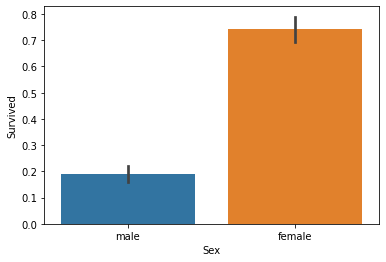

In [38]:
sns.barplot(x='Sex', y = 'Survived', data=df_train);

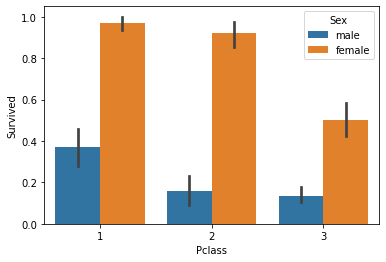

In [39]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train);

### 데이터 전처리

In [40]:
from sklearn.preprocessing import LabelEncoder

features = ['Cabin', 'Sex', 'Embarked']
for feature in features:
    le = LabelEncoder()
    df_train[feature] = le.fit_transform(df_train[feature])

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [16]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

### 생존자 예측

In [19]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('../static/data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df, y_titanic_df, train_size=0.2, random_state=1
)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# DecisionTreeClassifier 학습/예측/평가
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier 정확도: {accuracy_score(y_test, dt_pred):.4f}')

# RandomForestClassifier 학습/예측/평가
rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f'RandomForestClassifier 정확도:{accuracy_score(y_test, rf_pred):.4f}')

# LogisticRegression 학습/예측/평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f'LogisticRegression 정확도: {accuracy_score(y_test, lr_pred):.4f}')

# SupportVectorClassifier 학습/예측/평가
sv_clf = SVC(random_state=11)
sv_clf.fit(X_train, y_train)
sv_pred = sv_clf.predict(X_test)
print(f'SupportVectorClassifier 정확도: {accuracy_score(y_test, sv_pred):.4f}')

DecisionTreeClassifier 정확도: 0.7714
RandomForestClassifier 정확도:0.7952
LogisticRegression 정확도: 0.7672
SupportVectorClassifier 정확도: 0.6704
